In [54]:
import pandas as pd
import numpy as np 
import configUtils
import config
from matplotlib import pyplot as plt 

arguments = {}
arguments["donorFile"] = config.filePaths.get("donorFile")
arguments["recipientFile"] = config.filePaths.get("recipientFile")

In [ ]:
columnNames  = ["#chrom", "start", "end", "read_id", "mapq", "cigar1", "cigar2"]
fullDonorNumpy = pd.read_csv(arguments["donorFile"],
            sep = "\t", names = columnNames, skiprows=11).to_numpy()
fullRecipientNumpy = pd.read_csv(arguments["recipientFile"],
            sep = "\t", names = columnNames, skiprows=11).to_numpy()

print("Done reading bed files")

#TODO remove once testing is done
# fullDonorNumpy = fullDonorNumpy[0:15]
# fullRecipientNumpy = fullRecipientNumpy[0:15]
print(fullDonorNumpy)

donorRows, donorCols = fullDonorNumpy.shape
recipRows, recipCols = fullRecipientNumpy.shape

donorLabelsArray = np.zeros((donorRows, 1))
recipLabelsArray = np.ones((recipRows, 1))

lengthNumpyDonor = fullDonorNumpy[:,2].astype(int) - fullDonorNumpy[:,1].astype(int)
lengthNumpyDonor = lengthNumpyDonor.reshape((donorRows, 1))
lengthNumpyDonor = np.append(lengthNumpyDonor, donorLabelsArray, axis=1)

lengthNumpyRecip = fullRecipientNumpy[:,2].astype(int) - fullRecipientNumpy[:,1].astype(int)
lengthNumpyRecip = lengthNumpyRecip.reshape((recipRows, 1))
lengthNumpyRecip = np.append(lengthNumpyRecip, recipLabelsArray, axis=1)

lengthArrayToPlot = np.append(lengthNumpyDonor,lengthNumpyRecip,axis=0)
print(lengthArrayToPlot)

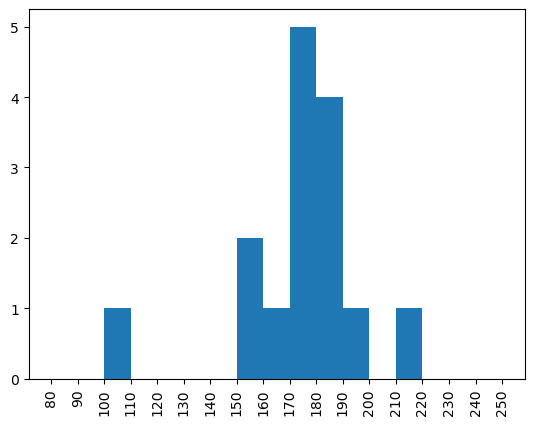

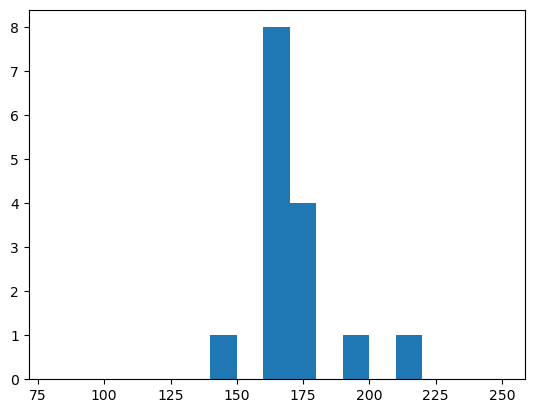

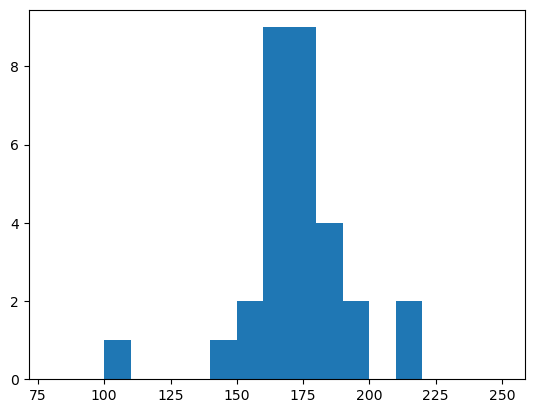

In [62]:
bins = [80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]

plt.hist(lengthNumpyDonor[:,0],bins = bins)
plt.xticks(bins)
plt.xticks(rotation=90)
plt.show()

plt.hist(lengthNumpyRecip[:,0],bins = bins)
plt.show()
plt.hist(lengthArrayToPlot[:,0],bins = bins)
plt.show()